In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('/content/tmdb_movies.csv')

# Display the first few rows to understand the dataset structure
df.head()


,id,belongs_to_collection,budget,genres,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,title,Keywords,cast,crew,revenue
0,2474,NaN,500000,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",en,May,Psychological horror about a lonely young woma...,8.398158,/kUaoxNyLFhZ8tOKFXu4xQnZJYxa.jpg,"[{'name': 'A Loopy Production LLC', 'id': 2969...","[{'iso_3166_1': 'US', 'name': 'United States o...",1/13/02,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",May,"[{'id': 2467, 'name': 'difficult childhood'}, ...","[{'cast_id': 1, 'character': 'May Dove Canady'...","[{'credit_id': '52fe43cb9251416c7501e60d', 'de...",1.502770e+05
1,6731,NaN,2300000,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...",en,Curdled,"Gabriella, a Columbian immigrant, is obsessed ...",2.781581,/9rEz6n5ypgE3Vu1M2RuNTah0Z7e.jpg,"[{'name': 'Tinderbox Films', 'id': 44774}]","[{'iso_3166_1': 'US', 'name': 'United States o...",9/6/96,88.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Curdled,"[{'id': 416, 'name': 'miami'}, {'id': 1490, 'n...","[{'cast_id': 18, 'character': 'Eduardo', 'cred...","[{'credit_id': '52fe44d19251416c750420c7', 'de...",2.209826e+06
2,2848,NaN,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",en,'71,A young British soldier must find his way back...,7.080550,/b8dmfG84peFdouN2N8wOsiI9WHt.jpg,"[{'name': 'Screen Yorkshire', 'id': 2690}, {'n...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",10/10/14,99.0,"[{'iso_639_1': 'en', 'name': 'English'}]",'71,"[{'id': 2187, 'name': 'riot'}, {'id': 6091, 'n...","[{'cast_id': 6, 'character': 'Gary Hook', 'cre...","[{'credit_id': '52fe4e319251416c91129807', 'de...",1.625847e+06
3,170,"[{'id': 8945, 'name': 'Mad Max Collection', 'p...",2000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",en,Mad Max 2,Max Rockatansky returns as the heroic loner wh...,11.189831,/voNuYkvQgDSqijCDllEaRntq7ln.jpg,"[{'name': 'Kennedy Miller Productions', 'id': ...","[{'iso_3166_1': 'AU', 'name': 'Australia'}]",12/24/81,95.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Mad Max 2: The Road Warrior,"[{'id': 1653, 'name': 'explosive'}, {'id': 178...","[{'cast_id': 6, 'character': 'Max Rockatansky'...","[{'credit_id': '55a77d5d92514109da000626', 'de...",2.460083e+07
4,2037,NaN,52000000,"[{'id': 18, 'name': 'Drama'}]",en,Apollo 13,The true story of technical troubles that scut...,18.761467,/6JQ9z3V9x4vlU2GSZx2yNO0PvuX.jpg,"[{'name': 'Imagine Entertainment', 'id': 23}, ...","[{'iso_3166_1': 'US', 'name': 'United States o...",6/30/95,140.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Apollo 13,"[{'id': 305, 'name': 'moon'}, {'id': 1196, 'na...","[{'cast_id': 19, 'character': 'Jim Lovell', 'c...","[{'credit_id': '52fe4253c3a36847f80158f9', 'de...",3.552379e+08


In [3]:
import ast

# Function to extract names from dictionary-based columns
def extract_names(column):
    return column.apply(lambda x: ', '.join([entry['name'] for entry in ast.literal_eval(x)]) if pd.notna(x) and isinstance(x, str) else '')

# Apply extraction to the relevant columns
df['genres'] = extract_names(df['genres'])
df['production_companies'] = extract_names(df['production_companies'])
df['production_countries'] = extract_names(df['production_countries'])
df['spoken_languages'] = extract_names(df['spoken_languages'])

df.head()

,id,belongs_to_collection,budget,genres,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,title,Keywords,cast,crew,revenue
0,2474,NaN,500000,"Drama, Horror, Thriller, Romance",en,May,Psychological horror about a lonely young woma...,8.398158,/kUaoxNyLFhZ8tOKFXu4xQnZJYxa.jpg,"A Loopy Production LLC, 2 Loop Films",United States of America,1/13/02,93.0,English,May,"[{'id': 2467, 'name': 'difficult childhood'}, ...","[{'cast_id': 1, 'character': 'May Dove Canady'...","[{'credit_id': '52fe43cb9251416c7501e60d', 'de...",1.502770e+05
1,6731,NaN,2300000,"Comedy, Crime, Thriller",en,Curdled,"Gabriella, a Columbian immigrant, is obsessed ...",2.781581,/9rEz6n5ypgE3Vu1M2RuNTah0Z7e.jpg,Tinderbox Films,United States of America,9/6/96,88.0,"English, Español",Curdled,"[{'id': 416, 'name': 'miami'}, {'id': 1490, 'n...","[{'cast_id': 18, 'character': 'Eduardo', 'cred...","[{'credit_id': '52fe44d19251416c750420c7', 'de...",2.209826e+06
2,2848,NaN,0,"Thriller, Action, Drama, War",en,'71,A young British soldier must find his way back...,7.080550,/b8dmfG84peFdouN2N8wOsiI9WHt.jpg,"Screen Yorkshire, British Film Institute (BFI)...",United Kingdom,10/10/14,99.0,English,'71,"[{'id': 2187, 'name': 'riot'}, {'id': 6091, 'n...","[{'cast_id': 6, 'character': 'Gary Hook', 'cre...","[{'credit_id': '52fe4e319251416c91129807', 'de...",1.625847e+06
3,170,"[{'id': 8945, 'name': 'Mad Max Collection', 'p...",2000000,"Adventure, Action, Thriller, Science Fiction",en,Mad Max 2,Max Rockatansky returns as the heroic loner wh...,11.189831,/voNuYkvQgDSqijCDllEaRntq7ln.jpg,Kennedy Miller Productions,Australia,12/24/81,95.0,English,Mad Max 2: The Road Warrior,"[{'id': 1653, 'name': 'explosive'}, {'id': 178...","[{'cast_id': 6, 'character': 'Max Rockatansky'...","[{'credit_id': '55a77d5d92514109da000626', 'de...",2.460083e+07
4,2037,NaN,52000000,Drama,en,Apollo 13,The true story of technical troubles that scut...,18.761467,/6JQ9z3V9x4vlU2GSZx2yNO0PvuX.jpg,"Imagine Entertainment, Universal Pictures",United States of America,6/30/95,140.0,English,Apollo 13,"[{'id': 305, 'name': 'moon'}, {'id': 1196, 'na...","[{'cast_id': 19, 'character': 'Jim Lovell', 'c...","[{'credit_id': '52fe4253c3a36847f80158f9', 'de...",3.552379e+08


In [4]:
df.describe()

,id,budget,popularity,runtime,revenue
count,7398.000000,7.398000e+03,7398.000000,7392.000000,7.398000e+03
mean,3699.500000,2.260146e+07,8.514968,107.717262,6.915751e+07
std,2135.762978,3.694867e+07,12.165794,21.480040,1.275292e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,1850.250000,0.000000e+00,3.933124,94.000000,5.985223e+06
50%,3699.500000,7.500000e+06,7.435844,104.000000,2.367804e+07
75%,5548.750000,2.800000e+07,10.920002,118.000000,7.598655e+07
max,7398.000000,3.800000e+08,547.488298,338.000000,1.519558e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7398 entries, 0 to 7397
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     7398 non-null   int64  
 1   belongs_to_collection  1481 non-null   object 
 2   budget                 7398 non-null   int64  
 3   genres                 7398 non-null   object 
 4   original_language      7398 non-null   object 
 5   original_title         7398 non-null   object 
 6   overview               7376 non-null   object 
 7   popularity             7398 non-null   float64
 8   poster_path            7396 non-null   object 
 9   production_companies   7398 non-null   object 
 10  production_countries   7398 non-null   object 
 11  release_date           7397 non-null   object 
 12  runtime                7392 non-null   float64
 13  spoken_languages       7398 non-null   object 
 14  title                  7395 non-null   object 
 15  Keyw

In [6]:
from sklearn.preprocessing import OneHotEncoder

# Step 2: Data Preprocessing

# Handling missing values: Fill numerical columns with median values
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())
df = df.drop(columns =['id','belongs_to_collection','poster_path','title','Keywords', 'cast','crew'], axis=1)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7398 entries, 0 to 7397
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                7398 non-null   int64  
 1   genres                7398 non-null   object 
 2   original_language     7398 non-null   object 
 3   original_title        7398 non-null   object 
 4   overview              7376 non-null   object 
 5   popularity            7398 non-null   float64
 6   production_companies  7398 non-null   object 
 7   production_countries  7398 non-null   object 
 8   release_date          7397 non-null   object 
 9   runtime               7398 non-null   float64
 10  spoken_languages      7398 non-null   object 
 11  revenue               7398 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 693.7+ KB


,budget,genres,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,revenue
0,500000,"Drama, Horror, Thriller, Romance",en,May,Psychological horror about a lonely young woma...,8.398158,"A Loopy Production LLC, 2 Loop Films",United States of America,1/13/02,93.0,English,1.502770e+05
1,2300000,"Comedy, Crime, Thriller",en,Curdled,"Gabriella, a Columbian immigrant, is obsessed ...",2.781581,Tinderbox Films,United States of America,9/6/96,88.0,"English, Español",2.209826e+06
2,0,"Thriller, Action, Drama, War",en,'71,A young British soldier must find his way back...,7.080550,"Screen Yorkshire, British Film Institute (BFI)...",United Kingdom,10/10/14,99.0,English,1.625847e+06
3,2000000,"Adventure, Action, Thriller, Science Fiction",en,Mad Max 2,Max Rockatansky returns as the heroic loner wh...,11.189831,Kennedy Miller Productions,Australia,12/24/81,95.0,English,2.460083e+07
4,52000000,Drama,en,Apollo 13,The true story of technical troubles that scut...,18.761467,"Imagine Entertainment, Universal Pictures",United States of America,6/30/95,140.0,English,3.552379e+08


In [7]:
# Fill categorical columns with 'Unknown' for missing values
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
df[categorical_columns] = df[categorical_columns].fillna("Unknown")
df.head()

,budget,genres,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,revenue
0,500000,"Drama, Horror, Thriller, Romance",en,May,Psychological horror about a lonely young woma...,8.398158,"A Loopy Production LLC, 2 Loop Films",United States of America,1/13/02,93.0,English,1.502770e+05
1,2300000,"Comedy, Crime, Thriller",en,Curdled,"Gabriella, a Columbian immigrant, is obsessed ...",2.781581,Tinderbox Films,United States of America,9/6/96,88.0,"English, Español",2.209826e+06
2,0,"Thriller, Action, Drama, War",en,'71,A young British soldier must find his way back...,7.080550,"Screen Yorkshire, British Film Institute (BFI)...",United Kingdom,10/10/14,99.0,English,1.625847e+06
3,2000000,"Adventure, Action, Thriller, Science Fiction",en,Mad Max 2,Max Rockatansky returns as the heroic loner wh...,11.189831,Kennedy Miller Productions,Australia,12/24/81,95.0,English,2.460083e+07
4,52000000,Drama,en,Apollo 13,The true story of technical troubles that scut...,18.761467,"Imagine Entertainment, Universal Pictures",United States of America,6/30/95,140.0,English,3.552379e+08


In [8]:
# Extracting date-related features if a release date column exists
if "release_date" in df.columns:
    df["release_date"] = pd.to_datetime(df["release_date"], errors='coerce')
    df["release_year"] = df["release_date"].dt.year
    df["release_month"] = df["release_date"].dt.month
    df["release_day"] = df["release_date"].dt.day
    df = df.drop(columns=["release_date"])  # Drop original date column

# Creating new features based on existing ones
if "budget" in df.columns and "revenue" in df.columns:
    df["profit"] = df["revenue"] - df["budget"]  # Profit calculation
    df["profit_margin"] = np.where(df["budget"] > 0, df["profit"] / df["budget"], 0)

<ipython-input-8-9856c902fa15>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["release_date"] = pd.to_datetime(df["release_date"], errors='coerce')


In [9]:
df.head()

,budget,genres,original_language,original_title,overview,popularity,production_companies,production_countries,runtime,spoken_languages,revenue,release_year,release_month,release_day,profit,profit_margin
0,500000,"Drama, Horror, Thriller, Romance",en,May,Psychological horror about a lonely young woma...,8.398158,"A Loopy Production LLC, 2 Loop Films",United States of America,93.0,English,1.502770e+05,2002.0,1.0,13.0,-3.497230e+05,-0.699446
1,2300000,"Comedy, Crime, Thriller",en,Curdled,"Gabriella, a Columbian immigrant, is obsessed ...",2.781581,Tinderbox Films,United States of America,88.0,"English, Español",2.209826e+06,1996.0,9.0,6.0,-9.017376e+04,-0.039206
2,0,"Thriller, Action, Drama, War",en,'71,A young British soldier must find his way back...,7.080550,"Screen Yorkshire, British Film Institute (BFI)...",United Kingdom,99.0,English,1.625847e+06,2014.0,10.0,10.0,1.625847e+06,0.000000
3,2000000,"Adventure, Action, Thriller, Science Fiction",en,Mad Max 2,Max Rockatansky returns as the heroic loner wh...,11.189831,Kennedy Miller Productions,Australia,95.0,English,2.460083e+07,1981.0,12.0,24.0,2.260083e+07,11.300416
4,52000000,Drama,en,Apollo 13,The true story of technical troubles that scut...,18.761467,"Imagine Entertainment, Universal Pictures",United States of America,140.0,English,3.552379e+08,1995.0,6.0,30.0,3.032379e+08,5.831499


In [11]:
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_columns

['budget',
 'popularity',
 'runtime',
 'revenue',
 'release_year',
 'release_month',
 'release_day',
 'profit',
 'profit_margin']

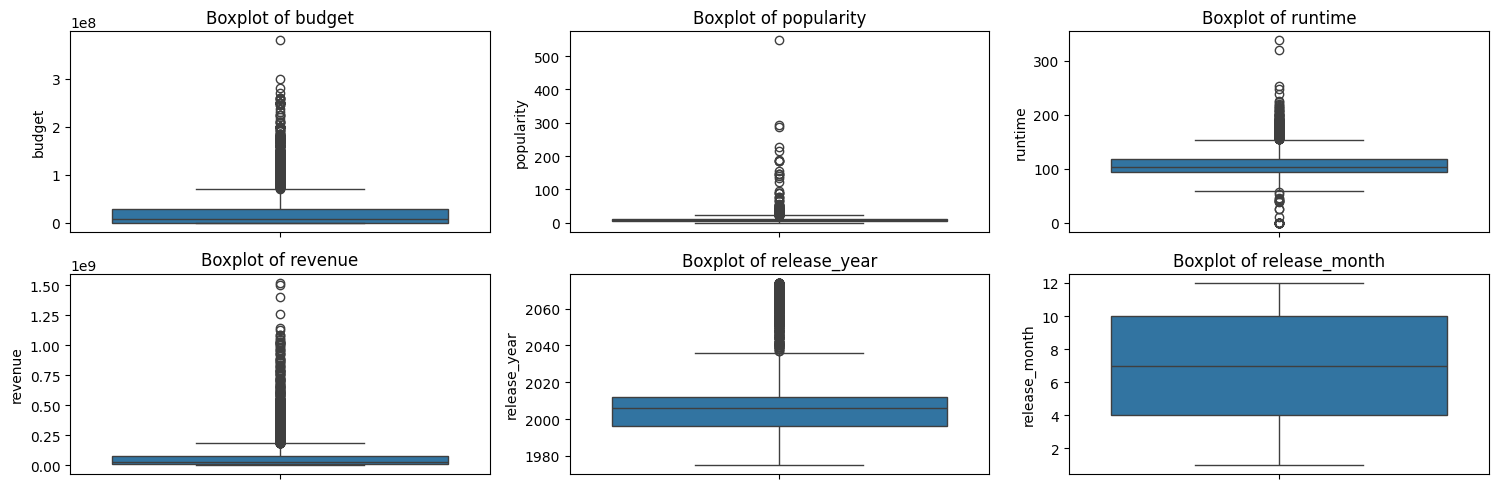

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 4: Outlier Detection and Handling
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Using Interquartile Range (IQR) method to detect outliers
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Detecting outliers in numerical columns
outliers = {}
for col in numerical_columns:
    outliers[col] = detect_outliers_iqr(df, col)

# Plot boxplots to visualize outliers
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_columns[:6]):  # Plot first 6 numerical features for visualization
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [12]:

# Handling Outliers: Capping extreme values
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_bound, upper_bound)

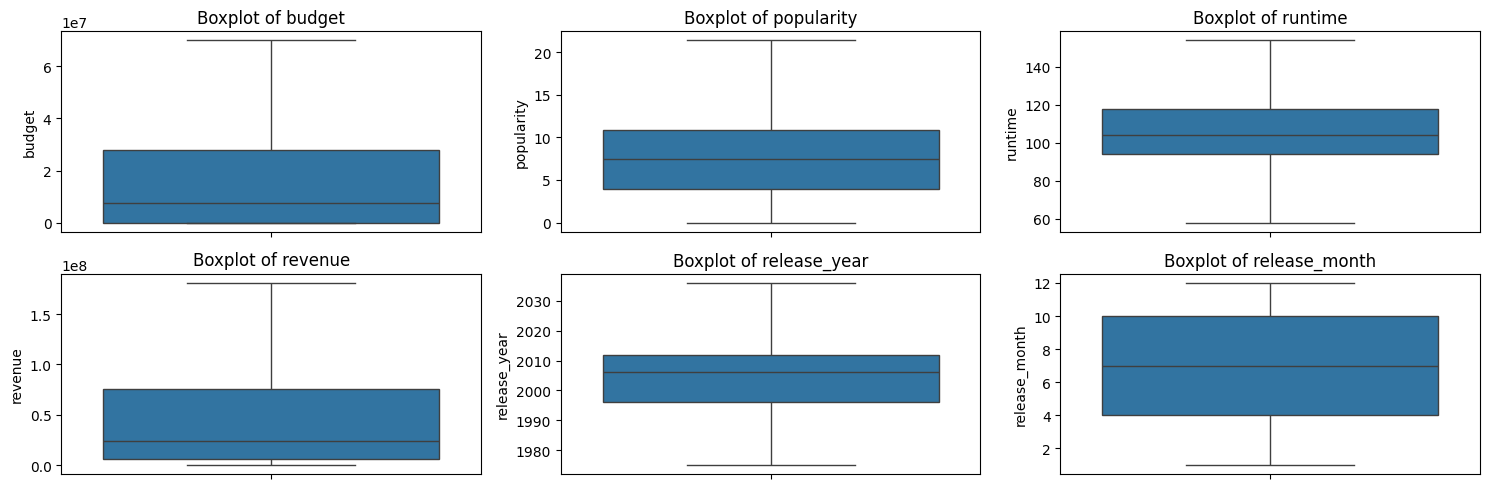

In [13]:
# Plot boxplots to visualize outliers
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_columns[:6]):  # Plot first 6 numerical features for visualization
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [14]:
df.to_csv('preprocessed_data.csv', index=False)

In [24]:
# Reloading the dataset again to ensure a fresh start
df_preprocessed = pd.read_csv('/content/preprocessed_data.csv')

# List of categorical columns to apply one-hot encoding
categorical_columns = ['genres', 'original_language', 'production_companies', 'production_countries', 'spoken_languages']

# Checking for missing values and replacing NaN with an empty string for proper encoding
df_preprocessed[categorical_columns] = df_preprocessed[categorical_columns].fillna('')

# High-cardinality columns where we limit encoding to top N categories
high_cardinality_columns = ['genres','production_companies', 'production_countries', 'spoken_languages']
top_n = 50  # Selecting the top 50 most frequent categories for encoding

for col in high_cardinality_columns:
    top_categories = df_preprocessed[col].value_counts().nlargest(top_n).index
    df_preprocessed[col] = df_preprocessed[col].apply(lambda x: x if x in top_categories else 'Other')

# Applying one-hot encoding for each categorical column
for col in categorical_columns:
    expanded_cols = df_preprocessed[col].astype(str).str.get_dummies(sep=', ')
    df_preprocessed = df_preprocessed.drop(columns=[col]).reset_index(drop=True)
    df_preprocessed = pd.concat([df_preprocessed, expanded_cols], axis=1)

# Display the optimized one-hot encoded dataset
# tools.display_dataframe_to_user(name="Optimized One-Hot Encoded Movie Dataset", dataframe=df_preprocessed)

# List of all correctly encoded columns
encoded_columns = list(df_preprocessed.columns)
encoded_columns


['budget',
 'original_title',
 'overview',
 'popularity',
 'runtime',
 'revenue',
 'release_year',
 'release_month',
 'release_day',
 'profit',
 'profit_margin',
 'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Other',
 'Romance',
 'Science Fiction',
 'Thriller',
 'War',
 'Western',
 'af',
 'ar',
 'bm',
 'bn',
 'ca',
 'cn',
 'cs',
 'da',
 'de',
 'el',
 'en',
 'es',
 'fa',
 'fi',
 'fr',
 'he',
 'hi',
 'hu',
 'id',
 'is',
 'it',
 'ja',
 'ka',
 'kn',
 'ko',
 'ml',
 'mr',
 'nb',
 'nl',
 'no',
 'pl',
 'pt',
 'ro',
 'ru',
 'sr',
 'sv',
 'ta',
 'te',
 'th',
 'tr',
 'ur',
 'vi',
 'xx',
 'zh',
 'Amblin Entertainment',
 'Blue Sky Studios',
 'Carolco Pictures',
 'Central Partnership',
 'Cinergi Pictures Entertainment',
 'Columbia Pictures',
 'Columbia Pictures Corporation',
 'Danjaq',
 'De Laurentiis Entertainment Group (DEG)',
 'Dimension Films',
 'DreamWorks Animation',
 'DreamWorks SKG',
 'Eon Produc

In [25]:
df_preprocessed.head()

,budget,original_title,overview,popularity,runtime,revenue,release_year,release_month,release_day,profit,...,Türkçe,Český,العربية,हिन्दी,தமிழ்,ภาษาไทย,广州话 / 廣州話,日本語,普通话,한국어/조선말
0,500000,May,Psychological horror about a lonely young woma...,8.398158,93.0,1.502770e+05,2002.0,1.0,13.0,-3.497230e+05,...,0,0,0,0,0,0,0,0,0,0
1,2300000,Curdled,"Gabriella, a Columbian immigrant, is obsessed ...",2.781581,88.0,2.209826e+06,1996.0,9.0,6.0,-9.017376e+04,...,0,0,0,0,0,0,0,0,0,0
2,0,'71,A young British soldier must find his way back...,7.080550,99.0,1.625847e+06,2014.0,10.0,10.0,1.625847e+06,...,0,0,0,0,0,0,0,0,0,0
3,2000000,Mad Max 2,Max Rockatansky returns as the heroic loner wh...,11.189831,95.0,2.460083e+07,1981.0,12.0,24.0,2.260083e+07,...,0,0,0,0,0,0,0,0,0,0
4,52000000,Apollo 13,The true story of technical troubles that scut...,18.761467,140.0,1.809885e+08,1995.0,6.0,30.0,1.197271e+08,...,0,0,0,0,0,0,0,0,0,0
